<a href="https://colab.research.google.com/github/RokonUddin370/Assignment-Decision-Tree-DT-Implementation-and-Comparison/blob/main/210120_Decision_Tree_(DT)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    confusion_matrix, roc_curve, auc,
    accuracy_score, precision_score,
    recall_score, f1_score
)


In [48]:
url = "https://raw.githubusercontent.com/RokonUddin370/Assignment-Decision-Tree-DT-Implementation-and-Comparison/bf377c11fc494f2643275d172bf1d4c9d129b80a/BreastCancer.csv"

df = pd.read_csv(url)
df.head()

,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,0
1,1002945,5,4,4,5,7,10.0,3,2,1,0
2,1015425,3,1,1,1,2,2.0,3,1,1,0
3,1016277,6,8,8,1,3,4.0,3,7,1,0
4,1017023,4,1,1,3,2,1.0,3,1,1,0


In [49]:
df.fillna(df.mean(numeric_only=True), inplace=True)


In [50]:
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

In [72]:
target_col = df.columns[-1]
print("Target Column:", target_col)

X = df.drop(target_col, axis=1)
y = df[target_col]


Target Column: Class


In [52]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

In [73]:
cart = DecisionTreeClassifier(criterion='gini', random_state=42)

param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10]
}
cart_grid = GridSearchCV(
    cart,
    param_grid,
    cv=5,
    scoring='accuracy'
)
cart_grid.fit(X_train, y_train)
best_cart = cart_grid.best_estimator_
print("Best CART Parameters:", cart_grid.best_params_)



Best CART Parameters: {'max_depth': 5, 'min_samples_split': 2}


In [54]:
id3 = DecisionTreeClassifier(criterion='entropy', random_state=42)
id3_cv = GridSearchCV(id3, param_grid, cv=5, scoring='accuracy')
id3_cv.fit(X_train, y_train)
best_id3 = id3_cv.best_estimator_
print("Best ID3 Params:", id3_cv.best_params_)

Best ID3 Params: {'max_depth': 7, 'min_samples_split': 5}


In [80]:
y_pred_cart = best_cart.predict(X_test)
y_pred_id3 = best_id3.predict(X_test)
y_prob_cart = best_cart.predict_proba(X_test)[:, 1]
y_prob_id3 = best_id3.predict_proba(X_test)[:, 1]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


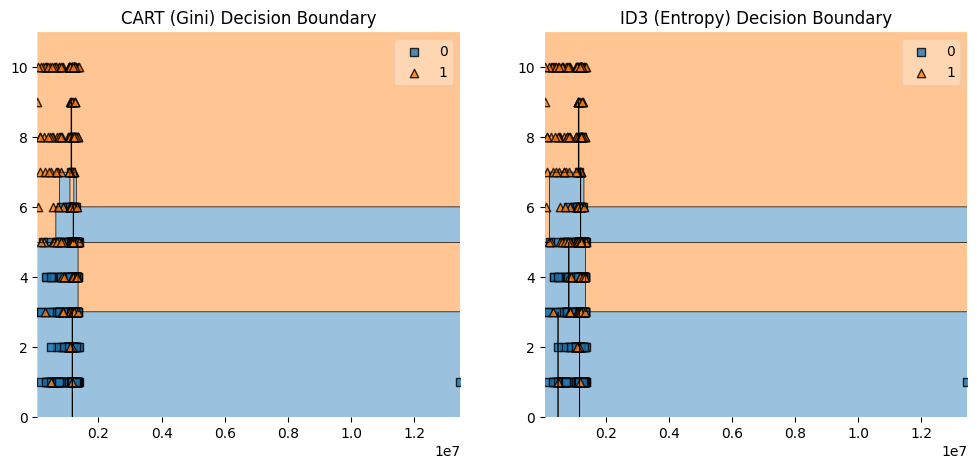

In [83]:
X_vis = X.iloc[:, :2]
Xv_train, Xv_test, yv_train, yv_test = train_test_split(
    X_vis, y, test_size=0.25, random_state=42, stratify=y
)
cart_vis = DecisionTreeClassifier(
    criterion='gini',
    max_depth=best_cart.max_depth,
    min_samples_split=best_cart.min_samples_split,
    random_state=42
)
id3_vis = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=best_id3.max_depth,
    min_samples_split=best_id3.min_samples_split,
    random_state=42
)
cart_vis.fit(Xv_train, yv_train)
id3_vis.fit(Xv_train, yv_train)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plot_decision_regions(Xv_train.values, yv_train.values, clf=cart_vis)
plt.title("CART (Gini) Decision Boundary")

plt.subplot(1,2,2)
plot_decision_regions(Xv_train.values, yv_train.values, clf=id3_vis)
plt.title("ID3 (Entropy) Decision Boundary")

plt.show()


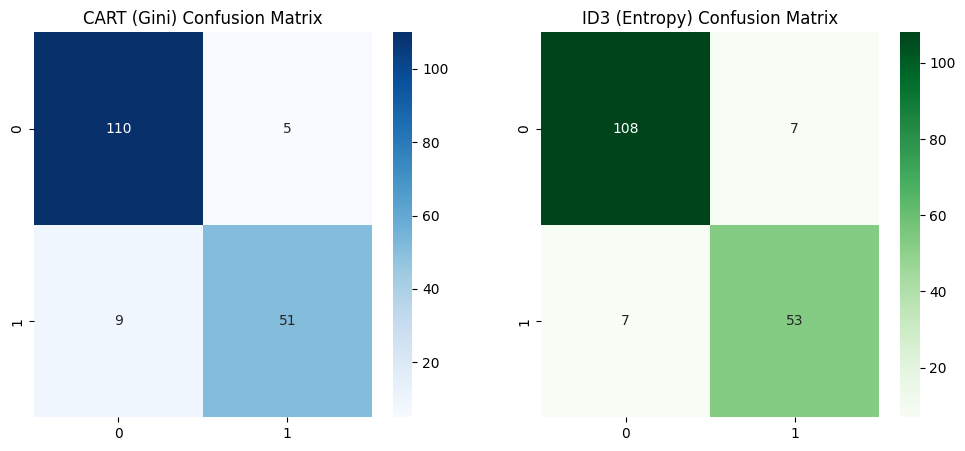

In [81]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(confusion_matrix(y_test, y_pred_cart),
            annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title("CART (Gini) Confusion Matrix")

sns.heatmap(confusion_matrix(y_test, y_pred_id3),
            annot=True, fmt='d', cmap='Greens', ax=ax[1])
ax[1].set_title("ID3 (Entropy) Confusion Matrix")

plt.show()



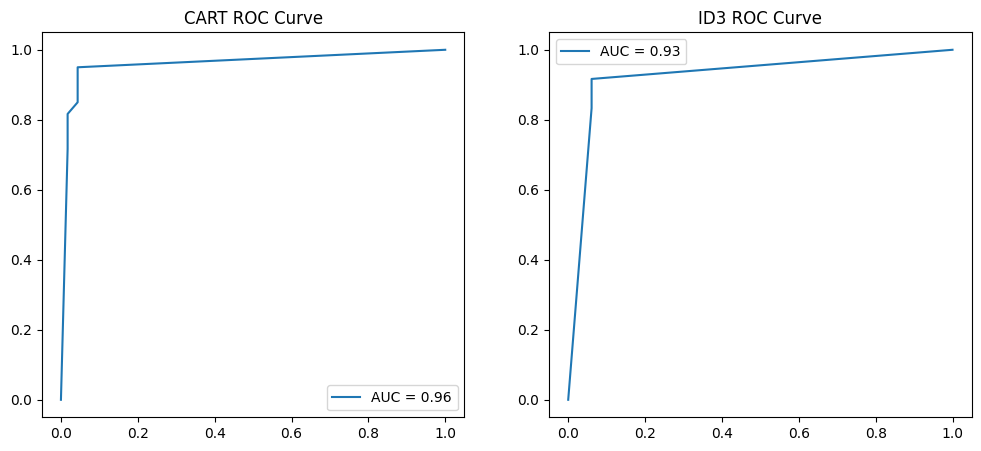

In [76]:
fpr_cart, tpr_cart, _ = roc_curve(y_test, y_prob_cart)
fpr_id3, tpr_id3, _ = roc_curve(y_test, y_prob_id3)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(fpr_cart, tpr_cart, label=f"AUC = {auc(fpr_cart, tpr_cart):.2f}")
plt.title("CART ROC Curve")
plt.legend()

plt.subplot(1,2,2)
plt.plot(fpr_id3, tpr_id3, label=f"AUC = {auc(fpr_id3, tpr_id3):.2f}")
plt.title("ID3 ROC Curve")
plt.legend()

plt.show()


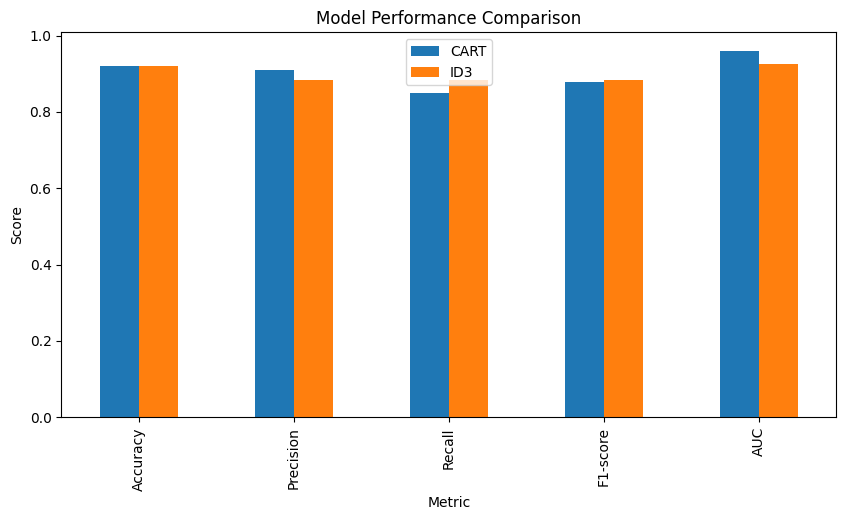

In [84]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'AUC']
cart_scores = [
    accuracy_score(y_test, y_pred_cart),
    precision_score(y_test, y_pred_cart),
    recall_score(y_test, y_pred_cart),
    f1_score(y_test, y_pred_cart),
    auc(fpr_cart, tpr_cart)
]
id3_scores = [
    accuracy_score(y_test, y_pred_id3),
    precision_score(y_test, y_pred_id3),
    recall_score(y_test, y_pred_id3),
    f1_score(y_test, y_pred_id3),
    auc(fpr_id3, tpr_id3)
]
df_metrics = pd.DataFrame({
    'Metric': metrics,
    'CART': cart_scores,
    'ID3': id3_scores
})
df_metrics.set_index('Metric').plot(kind='bar', figsize=(10,5))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.show()



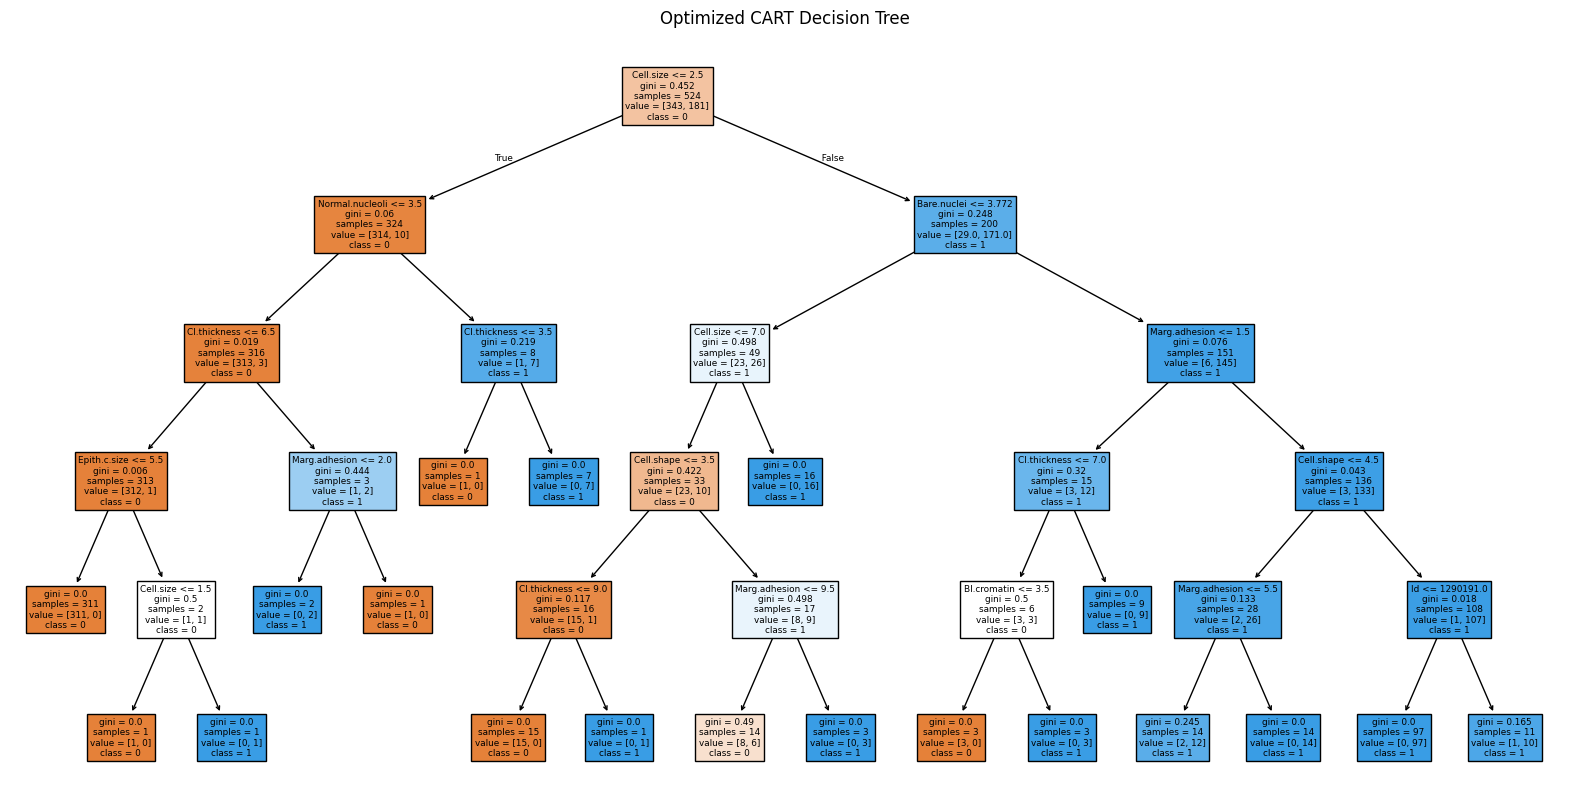

In [85]:
plt.figure(figsize=(20,10))
plot_tree(
    best_cart,
    feature_names=X.columns,
    class_names=[str(cls) for cls in best_cart.classes_],
    filled=True
)
plt.title("Optimized CART Decision Tree")
plt.show()
